# **Chapter 14**
# **Data Analysis Examples**

## **14.1 1.USA.gov Data from Bitly**

In [1]:
path = '../datasets/bitly_usagov/example.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json

In [4]:
path = '../datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [5]:
 records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### **Counting Time Zones in Pure Python**

In [6]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [8]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [9]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [10]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [11]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [12]:
len(time_zones)

3440

In [13]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [14]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [15]:
from collections import Counter

In [16]:
counts = Counter(time_zones)

In [17]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### **Counting Time Zones with pandas**

In [18]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [19]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [20]:
tz_counts = frame['tz'].value_counts()

In [21]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [22]:
clean_tz = frame['tz'].fillna('Missing')

In [23]:
 clean_tz[clean_tz == ''] = 'Unknown'

In [24]:
tz_counts = clean_tz.value_counts()

In [25]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [26]:
import seaborn as sns

<AxesSubplot:>

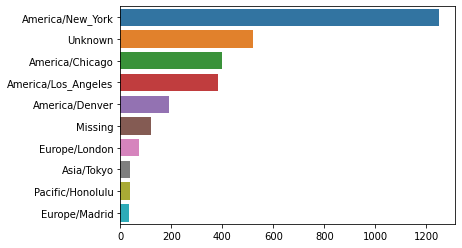

In [28]:
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [29]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [30]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [31]:
 frame['a'][51][:50] # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [32]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [33]:
 results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [34]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [35]:
cframe = frame[frame.a.notnull()]

In [37]:
import numpy as np
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                                            'Windows', 'Not Windows')

<ipython-input-37-3475003678fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'),


In [38]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [39]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [40]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [41]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [42]:
# Artan düzende sıralamak için kullanın
indexer = agg_counts.sum(1).argsort()

In [43]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [44]:
count_subset = agg_counts.take(indexer[-10:])

In [45]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [47]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [49]:
# Çizim için verileri yeniden düzenleyin
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

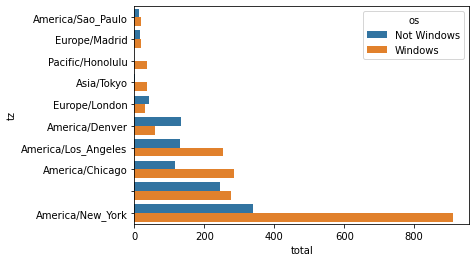

In [50]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [51]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [52]:
results = count_subset.groupby('tz').apply(norm_total)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

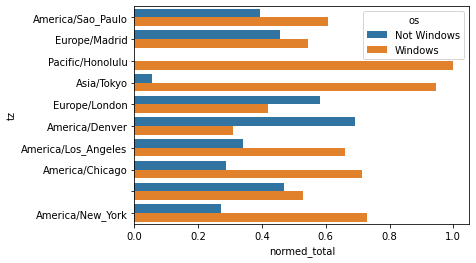

In [53]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [54]:
g = count_subset.groupby('tz')

In [55]:
results2 = count_subset.total / g.total.transform('sum')

## **14.2 MovieLens 1M Dataset**

In [50]:
import pandas as pd

In [51]:
# Make display smaller
pd.options.display.max_rows = 10

In [52]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('../datasets/movielens/users.dat', sep='::',
                      header=None, names=unames)

/mnt/sdb2/Data_science/ds-venv/lib/python3.8/site-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [53]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('../datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

In [54]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('../datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

In [55]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [56]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [57]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [10]:
data = pd.merge(pd.merge(ratings, users), movies)

In [11]:
 data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [12]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [58]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

In [59]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [60]:
ratings_by_title = data.groupby('title').size()

In [61]:
 ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [62]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [63]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [19]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

In [64]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [65]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [66]:
top_female_ratings[:10]

gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000
Lamerica (1994),5.0,4.666667
"Gambler, The (A J�t�kos) (1997)",5.0,3.166667
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
Ayn Rand: A Sense of Life (1997),5.0,4.000000


### **Measuring Rating Disagreement**

In [67]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [68]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [69]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
"James Dean Story, The (1957)",4.000000,1.000000,-3.000000
Country Life (1994),5.000000,2.000000,-3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,-3.000000
Babyfever (1994),3.666667,1.000000,-2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,-2.571429
Cobra (1925),4.000000,1.500000,-2.500000
"Other Side of Sunday, The (S�ndagsengler) (1996)",5.000000,2.928571,-2.071429
"To Have, or Not (1995)",4.000000,2.000000,-2.000000
For the Moment (1994),5.000000,3.000000,-2.000000


In [70]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000,NaN
Zachariah (1971),NaN,3.500000,NaN
Year of the Horse (1997),NaN,3.250000,NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN,3.000000,NaN
With Friends Like These... (1998),NaN,4.000000,NaN
With Byrd at the South Pole (1930),NaN,2.000000,NaN
Wings of Courage (1995),NaN,3.000000,NaN
Windows (1980),NaN,1.000000,NaN
Wild Bill (1995),NaN,3.146341,NaN


In [71]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

In [72]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [73]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## **14.3 US Baby Names 1880–2010**

In [30]:
names.head(10)

NameError: name 'names' is not defined

In [74]:
!head -n 10 ../datasets/babynames/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [4]:
import pandas as pd

In [5]:
names1880 = pd.read_csv('../datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])

In [6]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [7]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [8]:
years = range(1880, 2011)

In [9]:
pieces = []
columns = ['name', 'sex', 'births']

In [10]:
for year in years:
    path = '../datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

In [11]:
frame['year'] = year
pieces.append(frame)

In [12]:
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [13]:
names

,name,sex,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [14]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [15]:
 total_births.tail()

sex,F,M
year,,
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

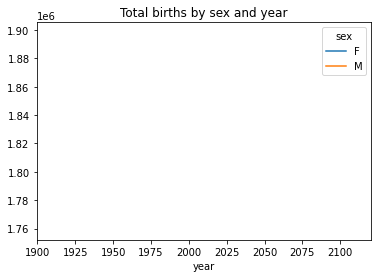

In [16]:
total_births.plot(title='Total births by sex and year')

In [18]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [17]:
names

,name,sex,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [19]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
2010  F      1.0
      M      1.0
Name: prop, dtype: float64

In [20]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [21]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [22]:
top1000

,name,sex,births,year,prop
0,Isabella,F,22731,2010,0.012923
1,Sophia,F,20477,2010,0.011641
2,Emma,F,17179,2010,0.009766
3,Olivia,F,16860,2010,0.009585
4,Ava,F,15300,2010,0.008698
...,...,...,...,...,...
1995,Camilo,M,194,2010,0.000102
1996,Destin,M,194,2010,0.000102
1997,Jaquan,M,194,2010,0.000102
1998,Jaydan,M,194,2010,0.000102


### **Analyzing Naming Trends**

In [23]:
boys = top1000[top1000.sex == 'M']

In [24]:
girls = top1000[top1000.sex == 'F']

In [25]:
total_births = top1000.pivot_table('births', index='year',
                                 columns='name',
                                   aggfunc=sum)

In [26]:
total_births.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB

SyntaxError: invalid syntax (<ipython-input-26-1058c26b1292>, line 2)

In [27]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

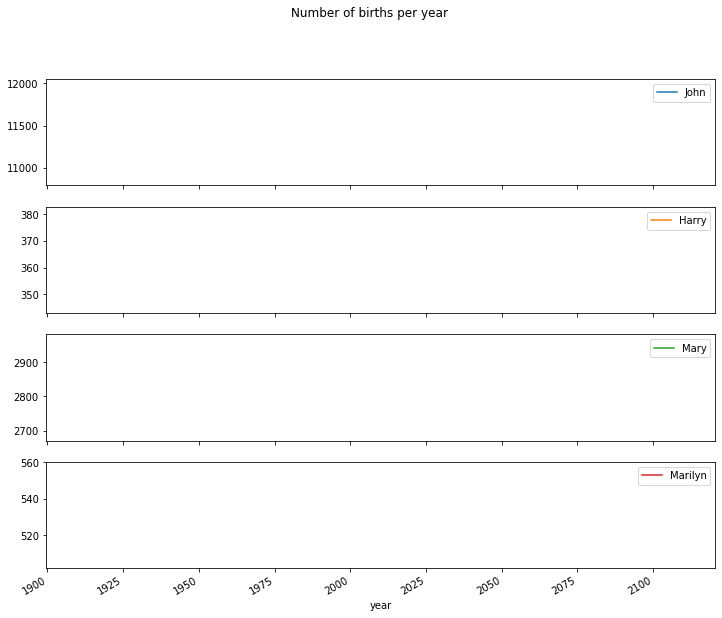

In [28]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### **Measuring the increase in naming diversity**

In [32]:
import numpy as np

In [29]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

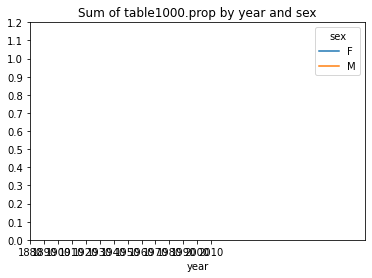

In [33]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10) )

In [34]:
df = boys[boys.year == 2010]

In [35]:
df

,name,sex,births,year,prop
1000,Jacob,M,21875,2010,0.011523
1001,Ethan,M,17866,2010,0.009411
1002,Michael,M,17133,2010,0.009025
1003,Jayden,M,17030,2010,0.008971
1004,William,M,16870,2010,0.008887
...,...,...,...,...,...
1995,Camilo,M,194,2010,0.000102
1996,Destin,M,194,2010,0.000102
1997,Jaquan,M,194,2010,0.000102
1998,Jaydan,M,194,2010,0.000102


In [36]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [37]:
prop_cumsum[:10]

1000    0.011523
1001    0.020934
1002    0.029959
1003    0.038930
1004    0.047817
1005    0.056579
1006    0.065155
1007    0.073414
1008    0.081528
1009    0.089621
Name: prop, dtype: float64

In [38]:
prop_cumsum.values.searchsorted(0.5)

116

In [39]:
df = boys[boys.year == 1900]

In [42]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [43]:
in1900.values.searchsorted(0.5) + 1

1

In [44]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [45]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [47]:
diversity.head()

sex,F,M
year,,
2010,246,117


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

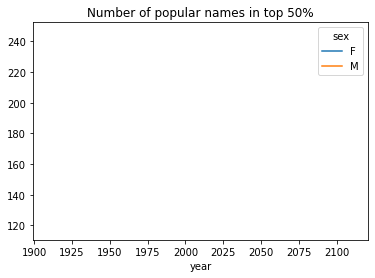

In [48]:
diversity.plot(title="Number of popular names in top 50%")

#### **The “last letter” revolution**

In [49]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [50]:
table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [51]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [52]:
subtable.head()

sex,F,M
year,2010,2010
last_letter,,
a,670605,28438
b,450,38859
c,946,23125
d,2607,44398
e,313833,129012


In [53]:
subtable.sum()

sex  year
F    2010    1759010
M    2010    1898382
dtype: int64

In [54]:
letter_prop = subtable / subtable.sum()

In [55]:
letter_prop

sex,F,M
year,2010,2010
last_letter,,
a,0.381240,0.014980
b,0.000256,0.020470
c,0.000538,0.012181
d,0.001482,0.023387
e,0.178415,0.067959
f,0.000055,0.001188
g,0.000374,0.001404
h,0.075852,0.051670


In [56]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

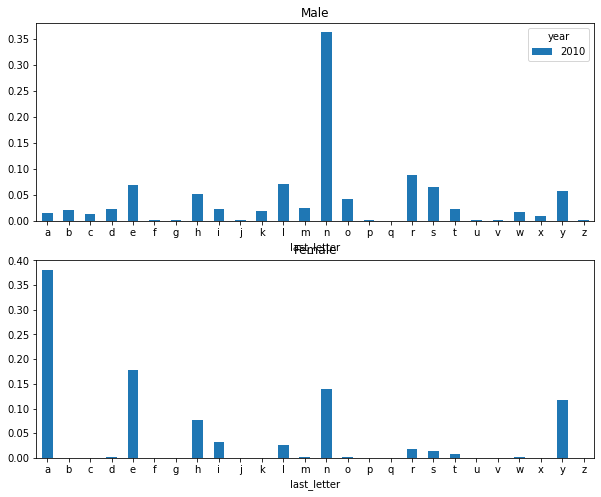

In [57]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [58]:
letter_prop = table / table.sum()

In [59]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [60]:
dny_ts.head()

last_letter,d,n,y
year,,,
2010,0.023387,0.362771,0.058168


<AxesSubplot:xlabel='year'>

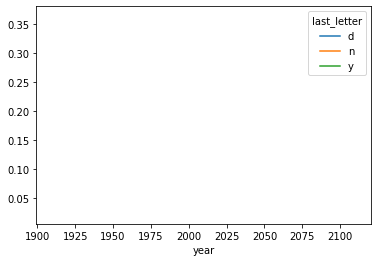

In [61]:
dny_ts.plot()

#### **Boy names that became girl names (and vice versa)**

In [62]:
all_names = pd.Series(top1000.name.unique())

In [63]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [64]:
lesley_like

196    Leslie
579     Lesly
dtype: object

In [65]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [66]:
filtered.groupby('name').births.sum()

name
Leslie    1558
Lesly      502
Name: births, dtype: int64

In [67]:
table = filtered.pivot_table('births', index='year',
                       columns='sex', aggfunc='sum')

In [68]:
table = table.div(table.sum(1), axis=0)

In [69]:
table.tail()

sex,F
year,
2010,1.0


<AxesSubplot:xlabel='year'>

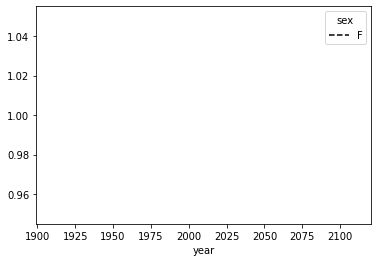

In [70]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## **14.4 USDA Food Database**

In [71]:
import json

In [72]:
db = json.load(open('../datasets/usda_food/database.json'))

In [73]:
len(db)

6636

In [74]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [75]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [76]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [77]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [78]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [79]:
info = pd.DataFrame(db, columns=info_keys)

In [80]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [81]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [82]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [83]:
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [85]:
nutrients.duplicated().sum() # number of duplicates

108

In [86]:
nutrients = nutrients.drop_duplicates()

In [88]:
col_mapping = {'description' : 'food',
               'group' : 'fgroup'}

In [89]:
info = info.rename(columns=col_mapping, copy=False)

In [90]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [91]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}

In [92]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [93]:
nutrients

,value,units,nutrient,nutgroup
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
5,39.280,g,Water,Composition
6,1573.000,kJ,Energy,Energy
7,0.000,g,"Fiber, total dietary",Composition
8,673.000,mg,"Calcium, Ca",Elements
9,0.640,mg,"Iron, Fe",Elements


In [95]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

KeyError: 'id'

In [97]:
ndata.info()

NameError: name 'ndata' is not defined

In [ ]:
ndata.iloc[30000]

In [ ]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [ ]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [ ]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [ ]:
get_maximum = lambda x: x.loc[x.value.idxmax()]

In [ ]:
get_minimum = lambda x: x.loc[x.value.idxmin()]

In [ ]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [ ]:
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [ ]:
max_foods.loc['Amino Acids']['food']

## **14.5 2012 Federal Election Commission Database**

In [98]:
import pandas  as pd
import numpy as np

In [99]:
 fec = pd.read_csv('../datasets/fec/P00000001-ALL.csv')

/mnt/sdb2/Data_science/ds-venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [100]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [101]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [102]:
unique_cands = fec.cand_nm.unique()

In [8]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [103]:
unique_cands[2]

'Obama, Barack'

In [10]:
parties = {'Bachmann, Michelle': 'Republican',
                     'Cain, Herman': 'Republican',
                     'Gingrich, Newt': 'Republican',
                     'Huntsman, Jon': 'Republican',
                     'Johnson, Gary Earl': 'Republican',
                     'McCotter, Thaddeus G': 'Republican',
                     'Obama, Barack': 'Democrat',
                     'Paul, Ron': 'Republican',
                     'Pawlenty, Timothy': 'Republican',
                     'Perry, Rick': 'Republican',
                     "Roemer, Charles E. 'Buddy' III": 'Republican',
                     'Romney, Mitt': 'Republican',
                     'Santorum, Rick': 'Republican'}

In [11]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [12]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [13]:
# Sütun olarak ekleyin
fec['party'] = fec.cand_nm.map(parties)

In [14]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [15]:
 (fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [16]:
fec = fec[fec.contb_receipt_amt > 0]

In [17]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### **Donation Statistics by Occupation and Employer**

In [18]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [19]:
occ_mapping = {
                 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
                 'INFORMATION REQUESTED' : 'NOT PROVIDED',
                 'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
                 'C.E.O.': 'CEO'
                }

In [20]:
# Eşleşme sağlanmadıysa, x döndür
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [21]:
emp_mapping = {
                 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
                 'INFORMATION REQUESTED' : 'NOT PROVIDED',
                 'SELF' : 'SELF-EMPLOYED',
                 'SELF EMPLOYED' : 'SELF-EMPLOYED',
                }

In [22]:
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [23]:
by_occupation = fec.pivot_table('contb_receipt_amt',
      index='contbr_occupation',
      columns='party', aggfunc='sum')

In [24]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


<AxesSubplot:ylabel='contbr_occupation'>

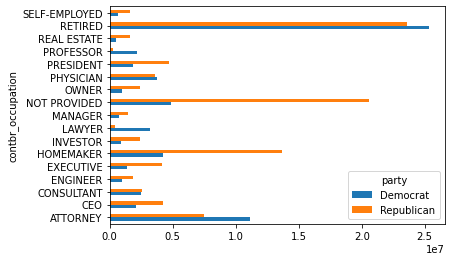

In [25]:
over_2mm.plot(kind='barh')

In [26]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [27]:
grouped = fec_mrbo.groupby('cand_nm')

In [28]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [29]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

### **Bucketing Donation Amounts**

In [30]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                                100000, 1000000, 10000000])

In [31]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [32]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [33]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [34]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [35]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [36]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [37]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<AxesSubplot:ylabel='contb_receipt_amt'>

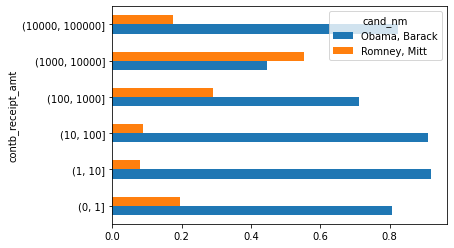

In [38]:
normed_sums[:-2].plot(kind='barh')

### **Donation Statistics by State**

In [39]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [40]:
 totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [41]:
totals = totals[totals.sum(1) > 100000]

In [42]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [43]:
percent = totals.div(totals.sum(1), axis=0)

In [44]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
